# Project Overview

This project focuses on predicting subsurface lithology using multivariate well logging measurements acquired during drilling and formation evaluation. The dataset includes conventional petrophysical logs, sonic measurements, resistivity curves, borehole condition indicators, drilling parameters, and spatial coordinates.
<br><br>
**Dataset Feature Description**

| Feature      | Description                     |
|-------------|---------------------------------|
| ROPA        | Rate of Penetration Average      |
| BS          | Bit Size                         |
| PEF         | Photoelectric Factor log         |
| RXO         | Flushed Zone Resistivity         |
| DCAL        | Differential Caliper log         |
| RMIC        | Micro Resistivity log            |
| ROP         | Rate of Penetration              |
| SP          | Self Potential Log               |
| RMED        | Medium Resistivity               |
| GR          | Gamma Ray                        |
| DTC         | Compressional Sonic Log          |
| MUDWEIGHT   | Drilling Mud Weight              |
| Y_LOC       | Y Location                       |
| DRHO        | Density Correction               |
| DEPTH_MD    | Measured Depth                   |
| DTS         | Shear Sonic Log                  |
| RHOB        | Bulk Density                     |
| NPHI        | Neutron Porosity                 |
| SGR         | Spectral Gamma Ray               |
| X_LOC       | X Location                       |
| CALI        | Caliper Log                      |
| RSHA        | Shallow Resistivity              |
| Z_LOC       | Z Location                       |
| RDEP        | Deep Resistivity                 |
| DEPT        | Depth                            |

<br>
These logs collectively capture lithological composition, porosity, fluid saturation effects, elastic properties, borehole quality, and drilling environment conditions.
<br><br>

**Lithology Label Mapping**<br>
The following table defines the mapping between numerical label codes and their corresponding lithology classes used in this dataset.

| Label Code | Lithology        |
|------------|------------------|
| 30000      | Sandstone        |
| 65030      | Sandstone/Shale  |
| 65000      | Shale            |
| 80000      | Marl             |
| 74000      | Dolomite         |
| 70000      | Limestone        |
| 70032      | Chalk            |
| 88000      | Halite           |
| 86000      | Anhydrite        |
| 99000      | Tuff             |
| 90000      | Coal             |
| 93000      | Basement         |

These labels are used as target classes for lithology classification tasks.

**<h2>Libraries Used**

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical

# EDA

**<h3>Load and Inspect Data Structure**

In [2]:
# Load Dataset
df = pd.read_csv("log_data.csv")

In [3]:
df.head()

,file_name,filename,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
0,15_9-13_part_2,NaN,65000.0,NaN,NaN,2.528508,NaN,NaN,NaN,34.137432,...,NaN,1.977766,0.451295,NaN,437637.0625,14.723362,NaN,-1629.347168,71.301712,1654.440
1,15_9-13_part_2,NaN,65000.0,NaN,NaN,2.550750,NaN,NaN,NaN,34.082783,...,NaN,1.983992,0.448149,NaN,437637.0625,14.790358,NaN,-1629.499146,71.424080,1654.592
2,15_9-13_part_2,NaN,65000.0,NaN,NaN,2.597338,NaN,NaN,NaN,34.025112,...,NaN,1.993954,0.463117,NaN,437637.0625,14.580812,NaN,-1629.651001,70.453835,1654.744
3,15_9-13_part_2,NaN,65000.0,NaN,NaN,2.644136,NaN,NaN,NaN,33.974854,...,NaN,1.998827,0.484266,NaN,437637.0625,14.550857,NaN,-1629.802979,69.725929,1654.896
4,15_9-13_part_2,NaN,65000.0,NaN,NaN,2.622839,NaN,NaN,NaN,35.693729,...,NaN,1.995712,0.488528,NaN,437637.0625,14.878370,NaN,-1629.954956,71.692444,1655.048


In [4]:
df.tail()

,file_name,filename,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
34853,16_2-7_part_2,NaN,30000.0,16.204319,8.5,2.649748,NaN,0.059636,NaN,17.195213,...,124.774727,2.446586,0.124552,NaN,480028.71875,8.559636,NaN,-2454.820068,113.416069,2479.932002
34854,16_2-7_part_2,NaN,30000.0,16.438597,8.5,2.878374,NaN,0.055276,NaN,17.765589,...,125.827652,2.462549,0.122629,NaN,480028.71875,8.555276,NaN,-2454.972168,113.251785,2480.084002
34855,16_2-7_part_2,NaN,30000.0,16.432211,8.5,2.918102,NaN,0.055590,NaN,17.870924,...,126.994171,2.462966,0.121804,NaN,480028.75000,8.555591,NaN,-2455.124023,114.119438,2480.236002
34856,16_2-7_part_2,NaN,30000.0,16.425831,8.5,2.671950,NaN,0.069607,NaN,17.475082,...,128.066284,2.453607,0.122108,NaN,480028.75000,8.569607,NaN,-2455.275879,110.219643,2480.388002
34857,16_2-7_part_2,NaN,30000.0,16.419399,8.5,2.627070,NaN,0.080483,NaN,16.850063,...,128.919708,2.459756,0.121771,NaN,480028.75000,8.580482,NaN,-2455.427734,106.876839,2480.540002


In [5]:
df["DTC"]

,DTC
0,val:153.01220703[UNIT]
1,val:152.47157288[UNIT]
2,val:154.04469299[UNIT]
3,val:155.33528137[UNIT]
4,155.70518494
...,...
34853,67.909591675
34854,val:68.505210876[UNIT]
34855,val:69.327644348[UNIT]
34856,val:70.122215271[UNIT]


In [6]:
df.shape

(34858, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34858 entries, 0 to 34857
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       34858 non-null  object 
 1   filename        0 non-null      float64
 2   Lithology_code  34629 non-null  float64
 3   ROPA            14195 non-null  float64
 4   BS              14197 non-null  float64
 5   PEF             32177 non-null  float64
 6   RXO             11426 non-null  float64
 7   DCAL            6998 non-null   float64
 8   RMIC            1673 non-null   float64
 9   ROP             34734 non-null  float64
 10  SP              20654 non-null  float64
 11  RMED            34780 non-null  float64
 12  GR              34730 non-null  float64
 13  DTC             34364 non-null  object 
 14  MUDWEIGHT       20608 non-null  float64
 15  Y_LOC           34840 non-null  float64
 16  DRHO            34191 non-null  float64
 17  DEPTH_MD        34840 non-null 

In [8]:
df["Lithology_code"].unique()

array([65000., 30000., 70000.,    nan, 99000., 80000., 65030., 86000.,
       74000.])

**<h3>Missing Value Analysis**

In [9]:
# Count missing
df.isnull().sum()

,0
file_name,0
filename,34858
Lithology_code,229
ROPA,20663
BS,20661
PEF,2681
RXO,23432
DCAL,27860
RMIC,33185
ROP,124


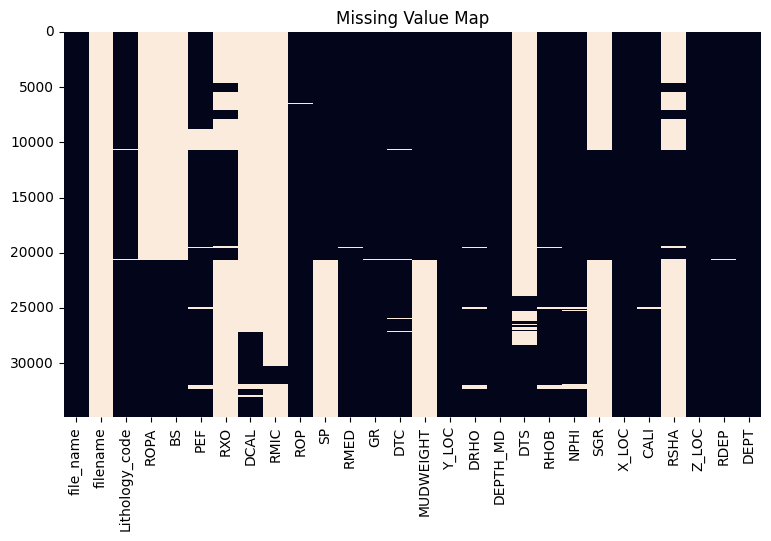

In [10]:
# Visualize missing values
plt.figure(figsize=(9, 5))
sns.heatmap(df.isnull(), cbar=False)

yticks = np.arange(0, len(df), 5000)
plt.yticks(ticks=yticks, labels=yticks)
plt.title("Missing Value Map")
plt.show()

**<h3>Target Distribution**

In [11]:
df["Lithology_code"].value_counts()

,count
Lithology_code,
65000.0,18323
70000.0,6411
30000.0,4905
80000.0,2980
65030.0,977
99000.0,741
74000.0,153
86000.0,139


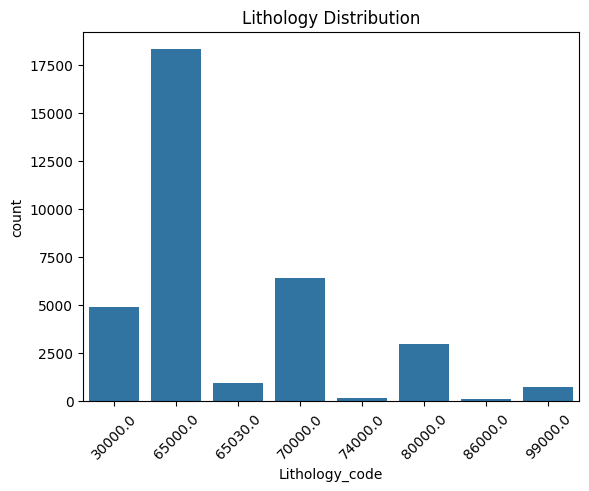

In [12]:
# Visualize
sns.countplot(data=df, x="Lithology_code")
plt.xticks(rotation=45)
plt.title("Lithology Distribution")
plt.show()

**<h3>Univariate Analysis**

In [13]:
# Statistical summary
df.describe()

,filename,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
count,0.0,34629.000000,14195.000000,14197.000000,32177.000000,11426.000000,6998.000000,1673.000000,34734.000000,20654.000000,...,8346.000000,34118.000000,34098.000000,9912.000000,34840.000000,34609.000000,11306.000000,34840.000000,34730.000000,34858.000000
mean,NaN,63111.389587,19.786010,10.631109,4.566489,23.241539,0.504515,2.005382,17.319951,69.185793,...,175.773541,2.278591,0.338813,59.238009,454739.289497,11.655016,2.704469,-2133.838371,370.338943,2158.510774
std,NaN,14859.641782,11.575592,1.857277,1.969816,201.199109,0.727395,1.118887,13.594382,33.274282,...,51.489062,0.217783,0.143418,33.320129,20109.157086,2.999034,3.229973,521.264808,920.758974,520.880920
min,NaN,30000.000000,0.472762,8.500000,2.141131,0.171424,-2.880711,0.132760,0.026013,15.399154,...,90.316788,1.492112,-0.015035,-196.869995,437592.906250,5.829491,0.175400,-3257.997803,5.951932,1136.162799
25%,NaN,65000.000000,11.370357,8.500000,3.246771,0.848820,0.050912,1.145328,4.633597,40.948497,...,132.159214,2.085881,0.222000,41.137985,437628.968750,8.726600,0.846841,-2517.808716,43.647770,1761.551499
50%,NaN,65000.000000,17.386066,12.250001,4.201906,1.339938,0.208271,1.868937,14.649324,62.390537,...,169.046738,2.300808,0.332709,59.177385,438597.218750,12.352001,1.321701,-2067.706420,67.292458,2092.677399
75%,NaN,70000.000000,26.787637,12.250001,5.374923,3.027935,0.632073,2.595791,26.433324,91.316940,...,195.667431,2.469504,0.473220,76.545515,477773.406250,13.025796,2.957229,-1736.784118,98.651260,2541.734499
max,NaN,99000.000000,91.352913,12.250001,50.412731,2000.000000,5.256504,7.299627,205.378418,153.096802,...,399.642761,2.984529,0.802569,152.516830,480028.750000,23.329569,54.536583,-1110.105835,5022.995437,3283.880000


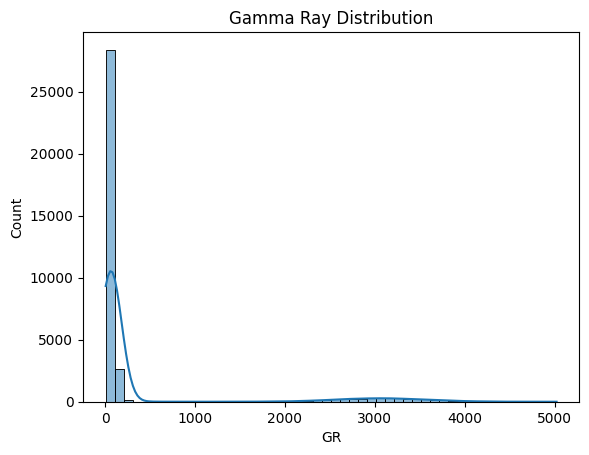

In [14]:
# GR Distribution
sns.histplot(df["GR"], bins=50, kde=True)
plt.title("Gamma Ray Distribution")
plt.show()

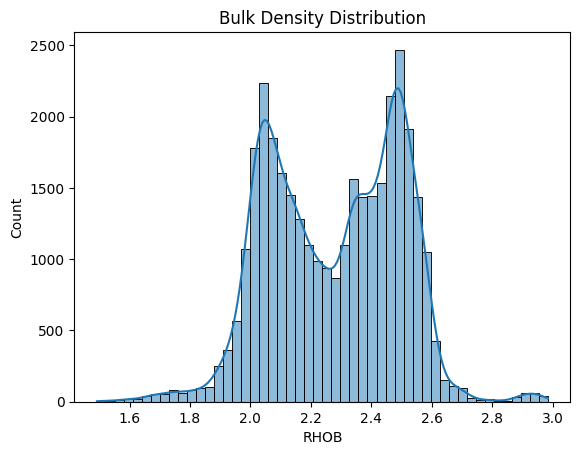

In [15]:
# RHOB Distribution
sns.histplot(df["RHOB"], bins=50, kde=True)
plt.title("Bulk Density Distribution")
plt.show()

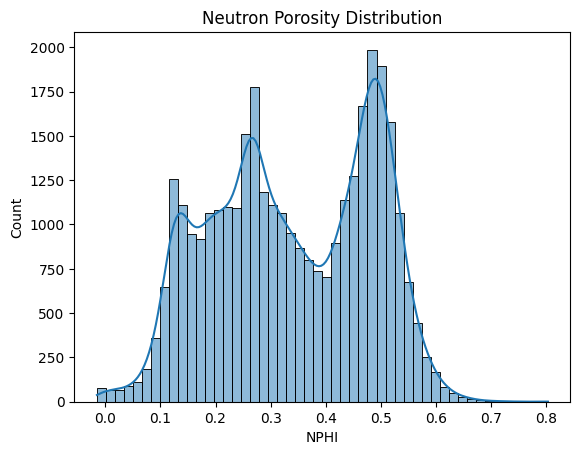

In [16]:
# NPHI Distribution
sns.histplot(df["NPHI"], bins=50, kde=True)
plt.title("Neutron Porosity Distribution")
plt.show()

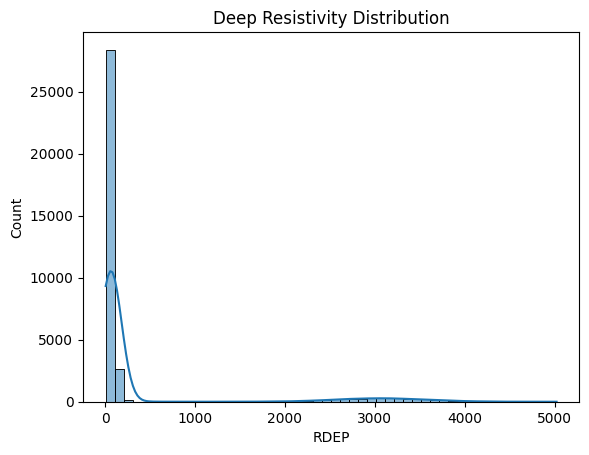

In [17]:
# Deep Resistivity Distribution
sns.histplot(df["RDEP"], bins=50, kde=True)
plt.title("Deep Resistivity Distribution")
plt.show()

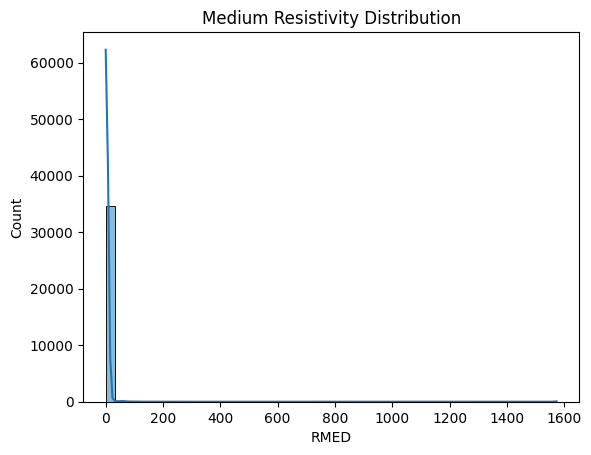

In [18]:
# Medium Resistivity Distribution
sns.histplot(df["RMED"], bins=50, kde=True)
plt.title("Medium Resistivity Distribution")
plt.show()

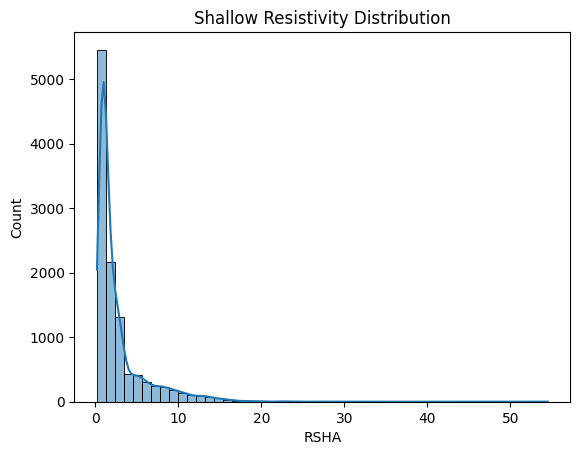

In [19]:
# Shallow Resistivity Distribution
sns.histplot(df["RSHA"], bins=50, kde=True)
plt.title("Shallow Resistivity Distribution")
plt.show()

In [20]:
df["GR"].describe()

,GR
count,34730.000000
mean,370.338943
std,920.758974
min,5.951932
25%,43.647770
50%,67.292458
75%,98.651260
max,5022.995437


**<h3>Depth-Based Visualization**

In [21]:
df = df.dropna(subset=["DEPTH_MD"])

In [22]:
df_eda = df.copy()

In [23]:
df_eda = df_eda.sort_values('DEPTH_MD').reset_index(drop=True)

In [24]:
df_eda["DEPTH_MD"].is_monotonic_increasing

True

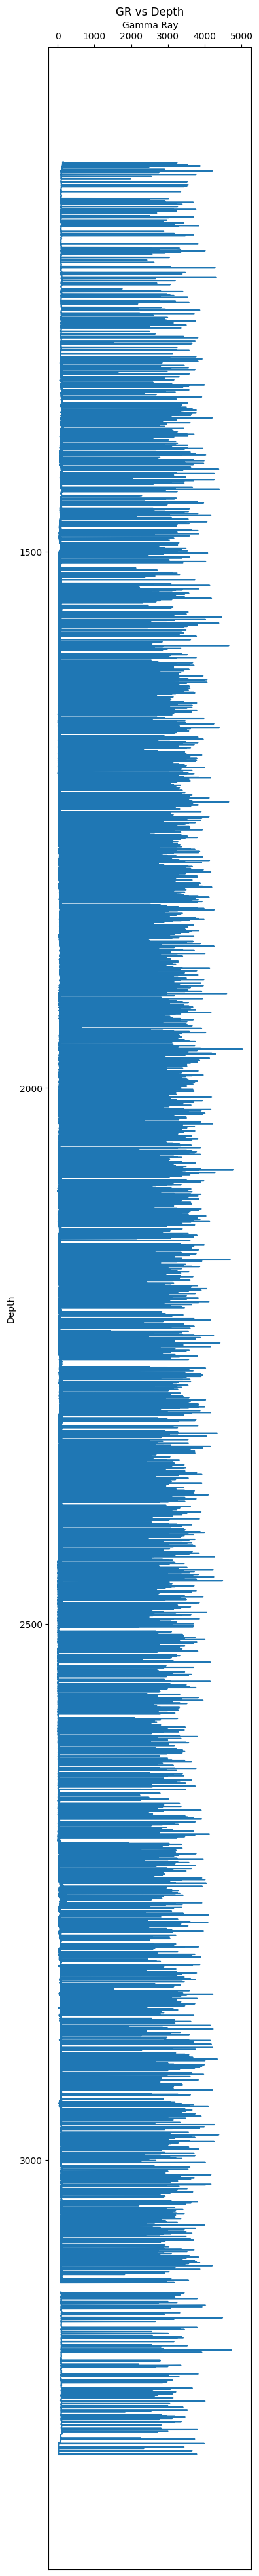

In [25]:
# GR vs Depth
plt.figure(figsize=(4, 50))
plt.plot(df_eda["GR"], df_eda["DEPTH_MD"])
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.tick_top()
plt.xlabel("Gamma Ray")
plt.ylabel("Depth")
plt.title("GR vs Depth")
plt.show()

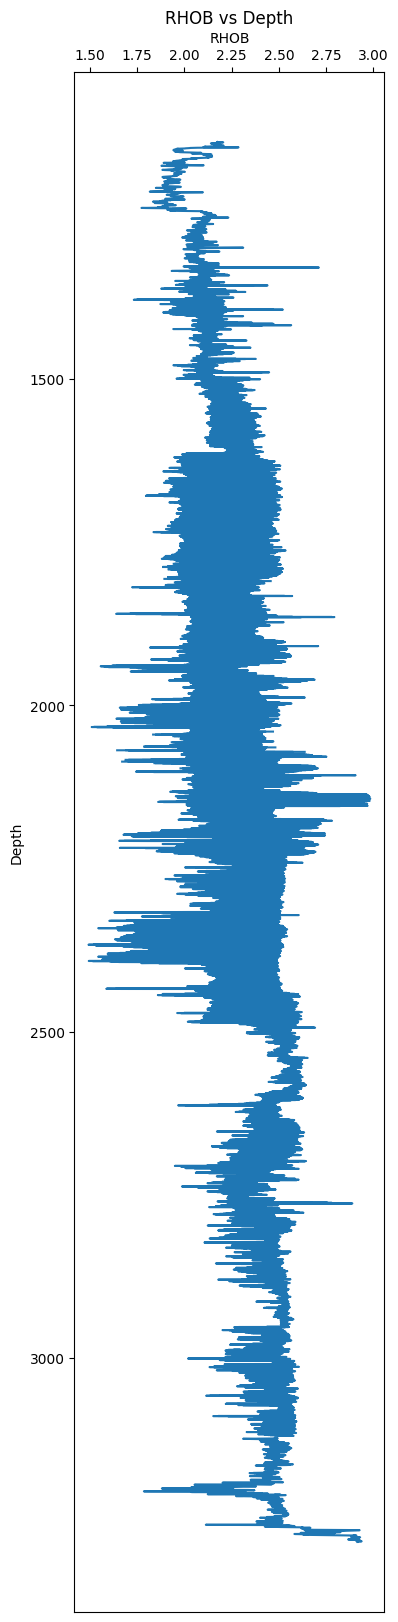

In [26]:
# RHOB vs Depth
plt.figure(figsize=(4, 20))
plt.plot(df_eda["RHOB"], df_eda["DEPTH_MD"])
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.tick_top()
plt.xlabel("RHOB")
plt.ylabel("Depth")
plt.title("RHOB vs Depth")
plt.show()

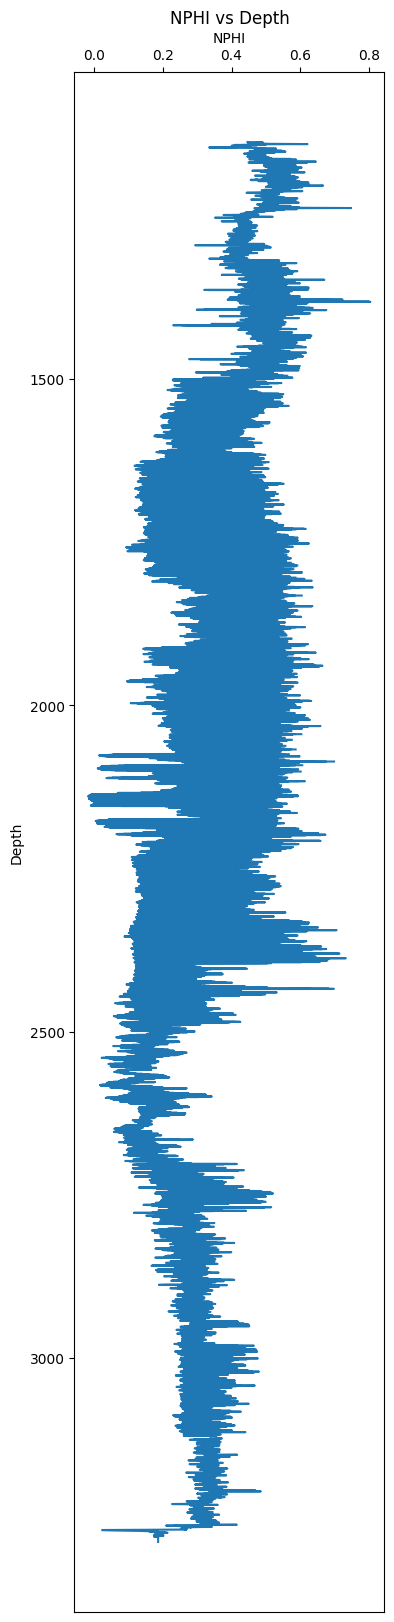

In [27]:
# NPHI vs Depth
plt.figure(figsize=(4, 20))
plt.plot(df_eda["NPHI"], df_eda["DEPTH_MD"])
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.tick_top()
plt.xlabel("NPHI")
plt.ylabel("Depth")
plt.title("NPHI vs Depth")
plt.show()

In [28]:
df_eda['DTC'] = pd.to_numeric(df_eda["DTC"], errors='coerce')

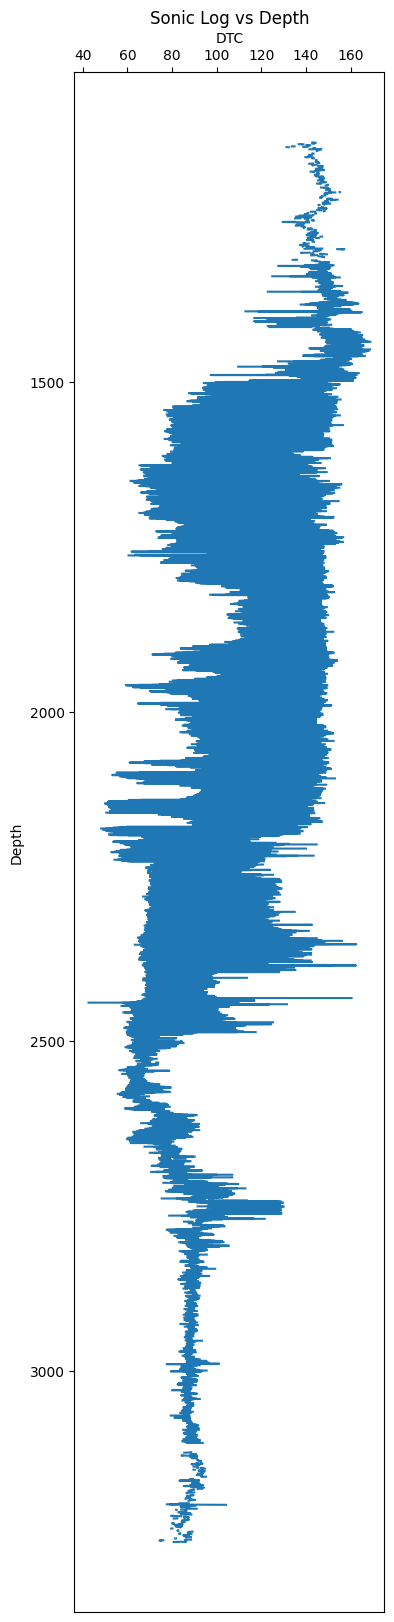

In [29]:
# Sonic log vs Depth
plt.figure(figsize=(4, 20))
plt.plot(df_eda["DTC"], df_eda["DEPTH_MD"])
plt.gca().invert_yaxis()
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.tick_top()
plt.xlabel("DTC")
plt.ylabel("Depth")
plt.title("Sonic Log vs Depth")
plt.show()

**<h3>Bivariate Analysis**

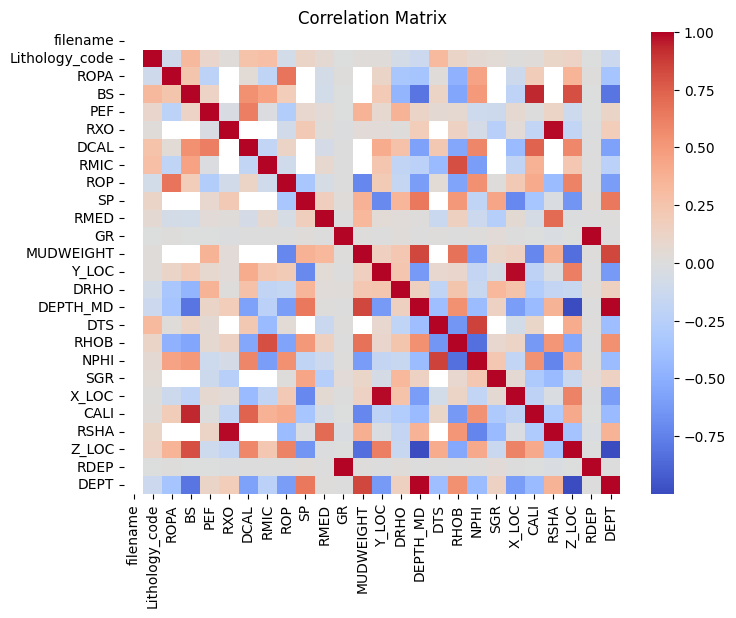

In [30]:
# Correlation Matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

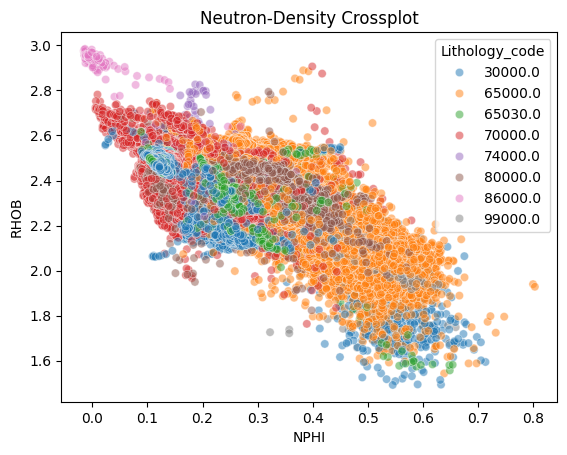

In [31]:
# Crossplot
sns.scatterplot(data=df, x="NPHI", y="RHOB", hue="Lithology_code", palette='tab10', alpha=0.5)
plt.title("Neutron-Density Crossplot")
plt.show()

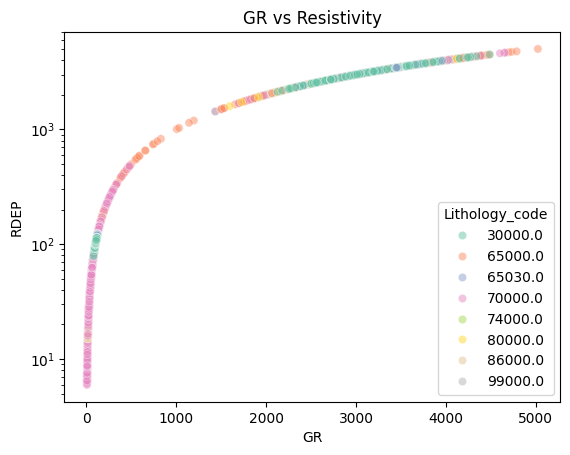

In [32]:
# GR vs Resistivity
sns.scatterplot(data=df, x="GR", y="RDEP", hue="Lithology_code", palette='Set2', alpha=0.5)
plt.yscale('log')
plt.title("GR vs Resistivity")
plt.show()

**<h3>Outlier Detection**

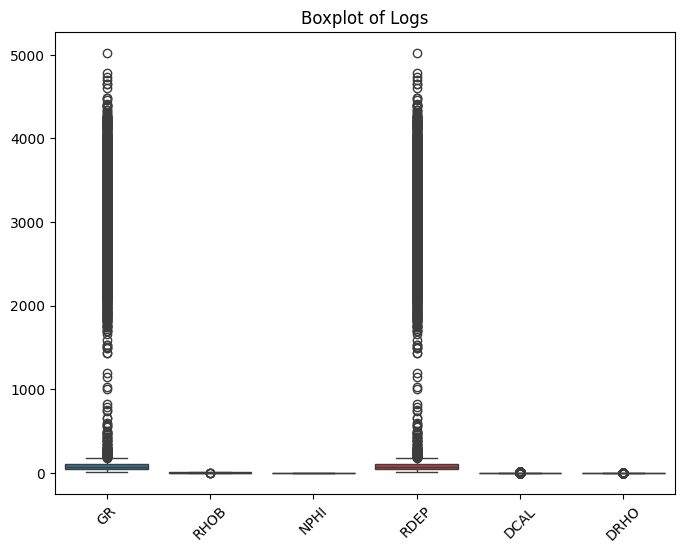

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[["GR", "RHOB", "NPHI", "DTC", "RDEP", "DCAL", "DRHO"]])
plt.xticks(rotation=45)
plt.title("Boxplot of Logs")
plt.show()

**<h3>Class-wise Statistical Comparison**

In [34]:
df_numeric = df.select_dtypes(include='number')
df_numeric.groupby("Lithology_code").mean()

,filename,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
Lithology_code,,,,,,,,,,,,,,,,,,,,,
30000.0,NaN,19.229002,8.924668,4.362951,2.610876,0.075274,1.204777,18.331848,54.513039,2.786975,...,155.782419,2.256882,0.275697,39.889252,459397.586748,11.344760,2.617836,-2261.598123,370.553762,2286.289854
65000.0,NaN,26.959072,11.751866,4.170692,18.571147,1.085756,1.908218,20.074441,71.773871,1.294581,...,196.316609,2.200565,0.420860,73.746206,448445.024738,12.070047,1.401664,-2120.927728,384.877629,2145.222578
65030.0,NaN,22.587184,8.693071,5.064184,3.382101,0.071921,0.976644,15.236203,77.467265,2.316372,...,173.852998,2.354357,0.269308,59.375080,462067.063492,9.084622,3.365948,-2405.037120,363.709726,2429.692600
70000.0,NaN,14.917029,11.201557,5.377931,7.633938,0.449065,2.691282,11.523132,63.281948,4.677060,...,157.624445,2.450844,0.182739,19.559073,460984.069188,11.729860,7.630385,-2084.075580,340.704516,2108.747842
74000.0,NaN,11.114026,8.500000,5.044634,4.503124,NaN,NaN,9.754285,116.586779,6.101192,...,116.154874,2.514052,0.233318,41.401148,462398.101920,9.119198,4.499669,-2401.759537,407.734240,2427.327811
80000.0,NaN,13.887923,9.899763,5.106477,7.846967,0.512896,2.120613,13.555138,85.526773,2.362213,...,242.584006,2.380212,0.277573,25.753947,469962.576468,10.177363,7.848377,-1995.124694,359.373763,2020.380056
86000.0,NaN,9.759490,8.500000,6.197712,NaN,0.059358,NaN,9.121485,148.507068,516.627987,...,97.970720,2.925544,0.012133,NaN,474832.973921,8.547913,NaN,-2256.791525,294.456863,2281.926563
99000.0,NaN,19.017375,12.250001,4.847087,1.568382,1.310111,NaN,15.938576,50.847493,0.925484,...,NaN,2.151995,0.438613,47.537205,451859.543143,13.777862,1.568469,-1943.400282,337.418980,1967.423196


In [35]:
df.groupby("Lithology_code")["GR"].describe()

,count,mean,std,min,25%,50%,75%,max
Lithology_code,,,,,,,,
30000.0,4905.0,370.553762,932.236458,20.815046,39.064888,51.728165,104.123665,4486.312066
65000.0,18322.0,384.877629,918.319187,19.158628,61.005469,85.129906,102.208477,5022.995437
65030.0,977.0,363.709726,891.112074,25.402557,62.385590,82.962112,102.823280,4033.481606
70000.0,6411.0,340.704516,928.025122,5.951932,14.279659,28.725561,43.257984,4655.375792
74000.0,153.0,407.734240,1014.413575,16.781336,20.674086,31.836670,46.202637,3710.172931
80000.0,2980.0,359.373763,908.390881,10.971514,45.659292,61.732386,86.791893,4257.867304
86000.0,139.0,294.456863,896.210410,14.999455,19.564201,23.025640,26.232475,3986.527853
99000.0,741.0,337.418980,913.972210,21.319984,40.336884,48.344257,58.895626,4415.379304


In [36]:
df.groupby("Lithology_code")["RHOB"].describe()

,count,mean,std,min,25%,50%,75%,max
Lithology_code,,,,,,,,
30000.0,4571.0,2.256882,0.221683,1.492112,2.138155,2.292524,2.465070,2.700346
65000.0,18320.0,2.200565,0.206242,1.543206,2.040042,2.126638,2.414953,2.889454
65030.0,936.0,2.354357,0.158713,1.556648,2.307680,2.380286,2.464044,2.616309
70000.0,6241.0,2.450844,0.126190,1.763386,2.372866,2.458548,2.549481,2.906611
74000.0,153.0,2.514052,0.158706,2.045969,2.405423,2.518596,2.634098,2.826842
80000.0,2871.0,2.380212,0.107078,1.823317,2.322475,2.367992,2.448808,2.794268
86000.0,139.0,2.925544,0.060471,2.639080,2.915298,2.943209,2.958558,2.984529
99000.0,741.0,2.151995,0.122280,1.654790,2.094334,2.170055,2.237902,2.448747


In [37]:
df.groupby("Lithology_code")["NPHI"].describe()

,count,mean,std,min,25%,50%,75%,max
Lithology_code,,,,,,,,
30000.0,4557.0,0.275697,0.147646,0.023705,0.139736,0.237821,0.349379,0.713023
65000.0,18318.0,0.420860,0.101828,0.069581,0.332397,0.451652,0.498908,0.802569
65030.0,944.0,0.269308,0.097636,0.088609,0.215845,0.256565,0.319862,0.653513
70000.0,6219.0,0.182739,0.081877,0.005916,0.136909,0.171735,0.218774,0.578753
74000.0,143.0,0.233318,0.067207,0.096835,0.186921,0.217780,0.273033,0.405830
80000.0,2892.0,0.277573,0.089113,0.052824,0.207420,0.289744,0.346497,0.574594
86000.0,139.0,0.012133,0.044605,-0.015035,-0.009712,-0.000155,0.010304,0.268823
99000.0,741.0,0.438613,0.066382,0.294223,0.385522,0.432629,0.481027,0.659060


# Feature Engineering

**LithologyPipeline Class (Short Description)**

Purpose:  
A Python class for feature engineering and preprocessing of lithology datasets, ensuring all transformations are reproducible, consistent, and safe from data leakage.

Key Points:  
- Cleans data: removes duplicates, replaces non-physical values, sorts by depth  
- Creates features: log transforms, ratios, derived metrics like ROP/MUD, VP/VS, RHOB-NPHI, gradients, and rolling statistics  
- Handles missing values using train medians  
- Drops unnecessary and highly correlated columns  
- fit() method prepares train data and returns features and target  
- transform() method applies the same transformations to test data  
- Flexible: new features can be added in _create_features() method


In [38]:
class LithologyPipeline:
    def __init__(self, use_scaler=False):
        self.medians = None
        self.scaler = None
        self.drop_cols = ["file_name", "filename", "BS", "DEPTH_MD", "DEPT", "df_clean_LOC", "Y_LOC", "DTC"]
        self.to_drop_corr = []
        self.use_scaler = use_scaler

    def fit(self, df, target_col="Lithology_code"):
        df = df.copy()

        # Separate target first
        y = df[target_col]
        X = df.drop(columns=[target_col])

        # Drop rows where target is NaN
        if y is not None:
            mask = y.notna()
            X = X[mask]
            y = y[mask]

        # Clean duplicates & non-physical values
        X = X.drop_duplicates()
        for col in X.select_dtypes(include=np.number).columns:
            X[col] = X[col].replace([np.inf, -np.inf], np.nan)

        # Sort by DEPTH_MD if exists
        if "DEPTH_MD" in X.columns:
            X = X.sort_values("DEPTH_MD").reset_index(drop=True)

        # Feature engineering
        X = self._create_features(X)

        # Drop unnecessary columns
        X_clean = X.drop(columns=[col for col in self.drop_cols if col in X.columns])

        # Fill missing values using train medians
        self.medians = X_clean.median(numeric_only=True)
        X_clean = X_clean.fillna(self.medians)

        # Drop highly correlated features
        corr_matrix = X_clean.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        self.to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.95)]
        X_clean = X_clean.drop(columns=self.to_drop_corr)

        # Optional scaling
        if self.use_scaler:
            self.scaler = StandardScaler()
            X_scaled = self.scaler.fit_transform(X_clean)
            X_clean = pd.DataFrame(X_scaled, columns=X_clean.columns)

        return X_clean, y

    def transform(self, df):
        df = df.copy()
        X = df.copy()

        # Clean duplicates & non-physical values
        X = X.drop_duplicates()
        for col in X.select_dtypes(include=np.number).columns:
            X[col] = X[col].replace([np.inf, -np.inf], np.nan)

        # Sort by DEPTH_MD if exists
        if "DEPTH_MD" in X.columns:
            X = X.sort_values("DEPTH_MD").reset_index(drop=True)

        # Feature engineering
        X = self._create_features(X)

        # Drop unnecessary columns
        X_clean = X.drop(columns=[col for col in self.drop_cols if col in X.columns])

        # Fill missing using train medians
        X_clean = X_clean.fillna(self.medians)

        # Drop correlated features same as train
        X_clean = X_clean.drop(columns=[col for col in self.to_drop_corr if col in X_clean.columns])

        # Optional scaling using train scaler
        if self.use_scaler and self.scaler is not None:
            X_scaled = self.scaler.transform(X_clean)
            X_clean = pd.DataFrame(X_scaled, columns=X_clean.columns)

        return X_clean

    def _create_features(self, df):
        # Log transforms
        res_cols = ["RDEP", "RMED", "RSHA", "RXO", "RMIC"]
        for col in res_cols:
            if col in df.columns:
                df[f"LOG10_{col}"] = np.log10(df[col] + 1e-6)

        # Ratio features
        ratio_pairs = [("RDEP", "RSHA"), ("RMED", "RXO"), ("RDEP", "RMED"), ("RMED", "RSHA")]
        for num, den in ratio_pairs:
            if num in df.columns and den in df.columns:
                df[f"{num}_{den}_RATIO"] = df[num] / (df[den] + 1e-6)

        # ROP / MUDWEIGHT
        if "ROP" in df.columns and "MUDWEIGHT" in df.columns:
            df["ROP_MUD_RATIO"] = df["ROP"] / (df["MUDWEIGHT"] + 1e-6)

        # DTC / DTS
        if "DTC" in df.columns:
            df["DTC_clean"] = df["DTC"].astype(str).str.extract(r"([-+]?\d*\.?\d+)").astype(float)
        if "DTC" in df.columns and "DTS" in df.columns:
            df["VP_VS_RATIO"] = df["DTC_clean"] / (df["DTS"] + 1e-6)
            df["VP_MINUS_VS"] = df["DTC_clean"] - df["DTS"]

        # RHOB / NPHI
        if "RHOB" in df.columns and "NPHI" in df.columns:
            df["RHOB_NPHI_DIFF"] = df["RHOB"] - df["NPHI"]
            df["RHOB_NPHI_PRODUCT"] = df["RHOB"] * df["NPHI"]

        # Gradient features
        gradient_cols = ["GR", "RHOB", "NPHI", "ROP", "RDEP"]
        for col in gradient_cols:
            if col in df.columns:
                df[f"{col}_GRAD"] = df[col].diff()

        # Rolling mean / std
        rolling_cols = ["GR", "RHOB", "NPHI", "ROP"]
        windows = [3, 5, 9]
        for col in rolling_cols:
            if col in df.columns:
                for w in windows:
                    df[f"{col}_ROLL_MEAN_{w}"] = df[col].rolling(window=w, center=True).mean()
                    df[f"{col}_ROLL_STD_{w}"] = df[col].rolling(window=w, center=True).std()

        return df

In [39]:
pipeline = LithologyPipeline()
X_train_fe, y_train = pipeline.fit(df, target_col="Lithology_code")

In [40]:
# Train/Val split
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_fe, y_train, test_size=0.2,
                                                              stratify=y_train, random_state=42)

In [41]:
# Mapping numeric codes to rock names
lith_mapping = {
    30000: "Sandstone",
    65030: "Sandstone/Shale",
    65000: "Shale",
    80000: "Marl",
    74000: "Dolomite",
    70000: "Limestone",
    70032: "Chalk",
    88000: "Halite",
    86000: "Anhydrite",
    99000: "Tuff",
    90000: "Coal",
    93000: "Basement"
}

# Apply mapping to target column
y_train_final = y_train_final.map(lith_mapping)
y_val = y_val.map(lith_mapping)

In [59]:
y_train_final.unique()

array(['Shale', 'Limestone', 'Sandstone', 'Marl', 'Dolomite', 'Tuff',
       'Sandstone/Shale', 'Anhydrite'], dtype=object)

In [60]:
y_val.unique()

array(['Shale', 'Limestone', 'Tuff', 'Marl', 'Sandstone',
       'Sandstone/Shale', 'Anhydrite', 'Dolomite'], dtype=object)

# Modeling

**<h3>Baseline Model: Random Forest**

In [42]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_final, y_train_final)

RandomForestClassifier(n_estimators=200, random_state=42)

In [43]:
y_pred_rf = rf.predict(X_val)

print("=== Random Forest Classification Report ===")
print(classification_report(y_val, y_pred_rf))

=== Random Forest Classification Report ===
                 precision    recall  f1-score   support

      Anhydrite       0.96      0.86      0.91        28
       Dolomite       0.87      0.65      0.74        31
      Limestone       0.95      0.92      0.93      1282
           Marl       0.92      0.89      0.90       596
      Sandstone       0.89      0.90      0.90       981
Sandstone/Shale       0.81      0.42      0.55       195
          Shale       0.93      0.98      0.96      3665
           Tuff       0.94      0.71      0.81       148

       accuracy                           0.93      6926
      macro avg       0.91      0.79      0.84      6926
   weighted avg       0.92      0.93      0.92      6926



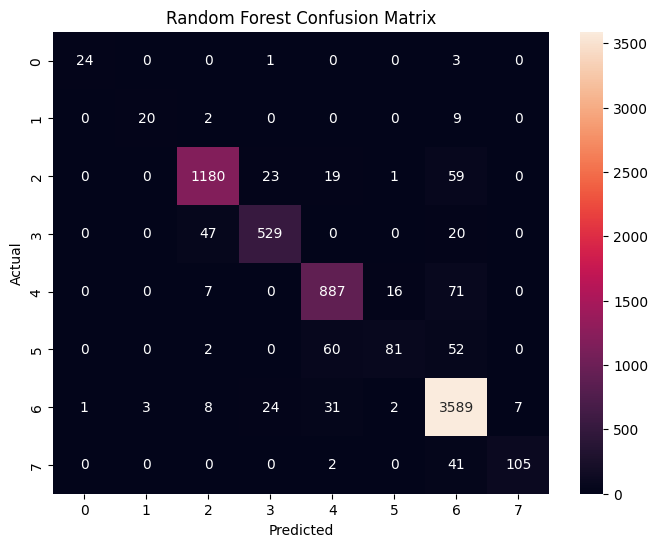

In [44]:
# confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**<h3>XGBoost Model**

In [45]:
# encode target
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train_final)
y_val_enc = le.transform(y_val)

| Original Code | Encoded |
|---------------|---------|
| 30000         | 0       |
| 65000         | 1       |
| 65030         | 2       |
| 70000         | 3       |
| 74000         | 4       |
| 80000         | 5       |
| 86000         | 6       |
| 99000         | 7       |

In [46]:
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y_train.unique()),
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    tree_methods='hist',
    eval_metrics='mlogloss'
)

xgb_clf.fit(X_train_final, y_train_enc)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:55:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "tree_methods" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='mlogloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, ...)

In [47]:
y_pred_xgb = xgb_clf.predict(X_val)

print("=== XGBoost Classification Report ===")
print(classification_report(y_val_enc, y_pred_xgb))

=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.81      0.68      0.74        31
           2       0.94      0.91      0.93      1282
           3       0.90      0.90      0.90       596
           4       0.88      0.91      0.89       981
           5       0.78      0.42      0.55       195
           6       0.94      0.97      0.96      3665
           7       0.91      0.91      0.91       148

    accuracy                           0.93      6926
   macro avg       0.89      0.82      0.85      6926
weighted avg       0.92      0.93      0.92      6926



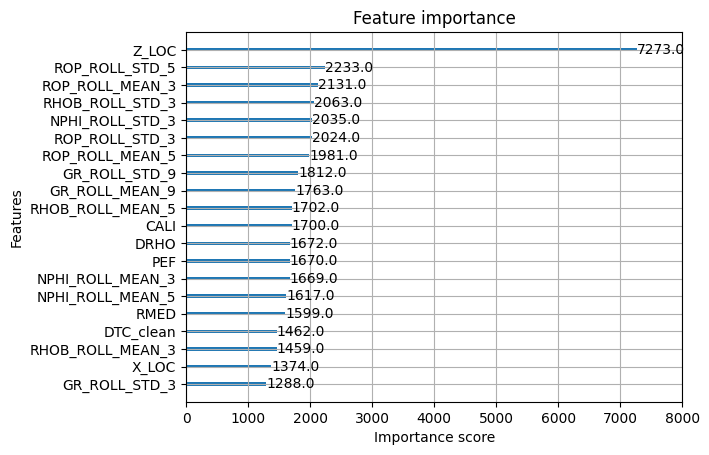

In [48]:
# feature importance
xgb.plot_importance(xgb_clf, max_num_features=20)
plt.show()

**<h3>Deep Learning Model: 1D CNN/MLP**

CNN is used to automatically capture local depth patterns in log data.

In [49]:
num_classes = len(np.unique(y_train_enc))

# one-hot encoding
y_train_cat = to_categorical(y_train_enc, num_classes=num_classes)
y_val_cat = to_categorical(y_val_enc, num_classes=num_classes)

# reshape for Conv1D: (samples, timesteps, features)
# treat depth as 1D sequence with features as channels
X_train_dl = np.expand_dims(X_train_final.values, axis=1)   # shape = (samples, 1, features)
X_val_dl = np.expand_dims(X_val.values, axis=1)

In [50]:
dl_model = Sequential([
    Input(shape=(X_train_dl.shape[1], X_train_dl.shape[2])),
    Conv1D(filters=32, kernel_size=1, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

dl_model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=['accuracy'])

In [51]:
dl_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 32)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 64)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,224 (51.66 KB)

 Trainable params: 13,160 (51.41 KB)

 Non-trainable params: 64 (256.00 B)

In [52]:
history = dl_model.fit(X_train_dl, y_train_cat, validation_split=0.1,
                       epochs=20, batch_size=64, verbose=1)

Epoch 1/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5034 - loss: 1.4294 - val_accuracy: 0.5319 - val_loss: 2.1286
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5662 - loss: 1.2536 - val_accuracy: 0.5002 - val_loss: 1.4167
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5801 - loss: 1.2246 - val_accuracy: 0.3612 - val_loss: 2.2285
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5714 - loss: 1.2245 - val_accuracy: 0.5633 - val_loss: 1.3438
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5757 - loss: 1.2118 - val_accuracy: 0.5381 - val_loss: 1.5503
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5776 - loss: 1.1992 - val_accuracy: 0.5319 - val_loss: 2.0533
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5851 - loss: 1.1727 - val_accuracy: 0.5319 - val_loss: 2.4625
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5824 - loss: 1.1724 - val_accuracy: 0.

In [53]:
# evaluate
y_pred_dl_prob = dl_model.predict(X_val_dl)
y_pred_dl = np.argmax(y_pred_dl_prob, axis=1)
y_val_int = np.argmax(y_val_cat, axis=1)

print("=== Deep Learning Classification Report ===")
print(classification_report(y_val_int, y_pred_dl, zero_division=0))

217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Deep Learning Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        31
           2       0.21      0.17      0.19      1282
           3       0.07      0.08      0.07       596
           4       0.20      0.56      0.29       981
           5       0.00      0.00      0.00       195
           6       0.77      0.50      0.60      3665
           7       0.00      0.00      0.00       148

    accuracy                           0.38      6926
   macro avg       0.16      0.16      0.14      6926
weighted avg       0.48      0.38      0.40      6926



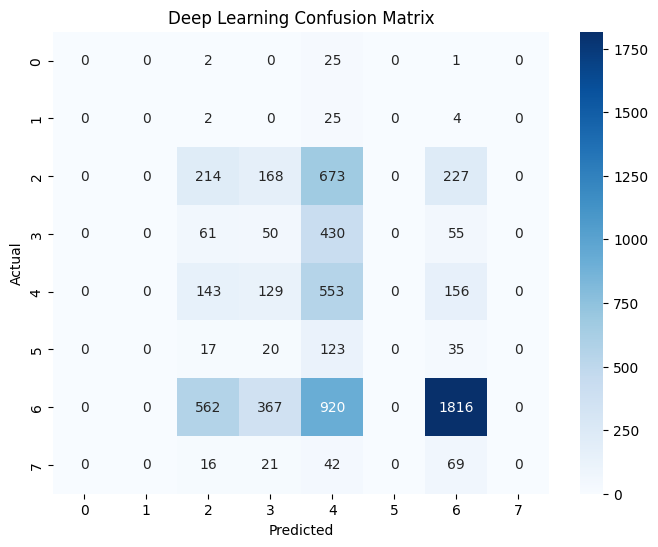

In [54]:
# confusion matrix
cm_dl = confusion_matrix(y_val_int, y_pred_dl)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap="Blues")
plt.title("Deep Learning Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**<h3>Model Selection**

In [62]:
np.unique(y_pred_rf)

array(['Anhydrite', 'Dolomite', 'Limestone', 'Marl', 'Sandstone',
       'Sandstone/Shale', 'Shale', 'Tuff'], dtype=object)

In [63]:
# ensure all prediction result mapped by le
y_pred_rf_enc = le.transform(y_pred_rf)

In [65]:
results = {
    "Random Forest": [accuracy_score(y_val_int, y_pred_rf_enc), f1_score(y_val_int, y_pred_rf_enc, average='macro')],
    "XGBoost": [accuracy_score(y_val_int, y_pred_xgb), f1_score(y_val_int, y_pred_xgb, average='macro')],
    "Deep Learning": [accuracy_score(y_val_int, y_pred_dl), f1_score(y_val_int, y_pred_dl, average='macro')],
}

results_df = pd.DataFrame(results, index=["Accuracy", "Macro F1"]).T
results_df

,Accuracy,Macro F1
Random Forest,0.926220,0.836329
XGBoost,0.926364,0.846747
Deep Learning,0.380162,0.144490


In [67]:
# Model with highest Macro F1
best_model_name = results_df['Macro F1'].idxmax()
print(f"Best model based on Macro F1: {best_model_name}")

Best model based on Macro F1: XGBoost


In [68]:
# Save model
best_model = xgb_clf
best_model.save_model("lithology_xgb_model.json")
print(f"{best_model_name} saved successfully!")

XGBoost saved successfully!
